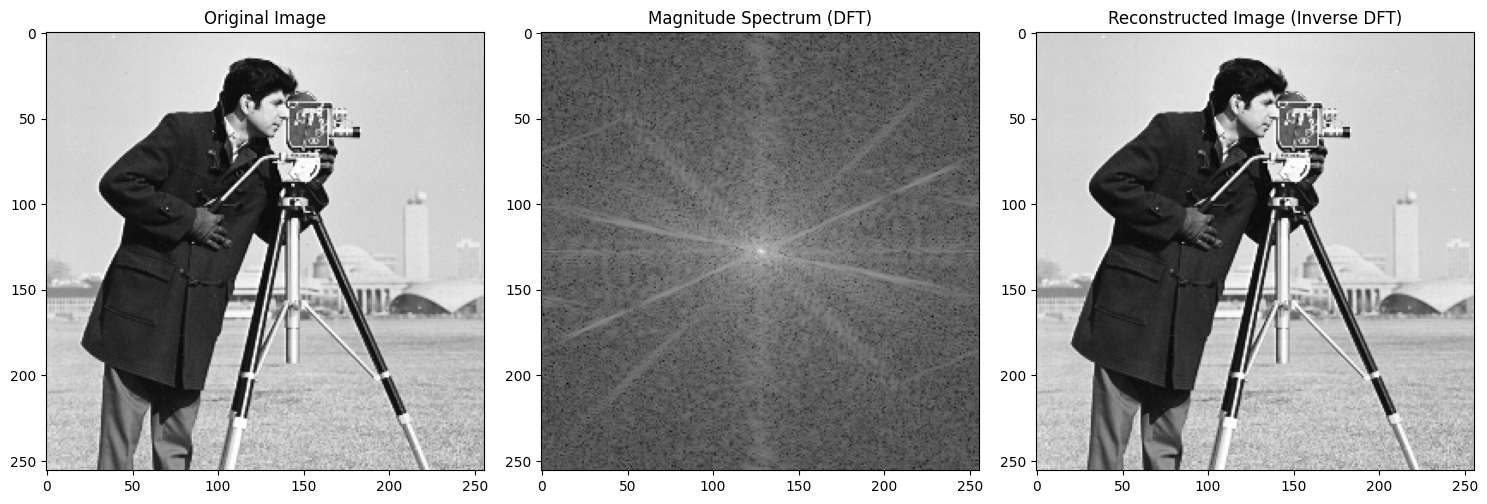

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = '/content/cameraman-testimage.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)

magnitude_spectrum = np.abs(dft_shifted)
magnitude_spectrum = np.log(magnitude_spectrum + 1)

dft_ishifted = np.fft.ifftshift(dft_shifted)
image_reconstructed = np.fft.ifft2(dft_ishifted)
image_reconstructed = np.abs(image_reconstructed)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(magnitude_spectrum, cmap='gray')
axes[1].set_title('Magnitude Spectrum (DFT)')
axes[2].imshow(image_reconstructed, cmap='gray')
axes[2].set_title('Reconstructed Image (Inverse DFT)')

plt.tight_layout()
plt.show()


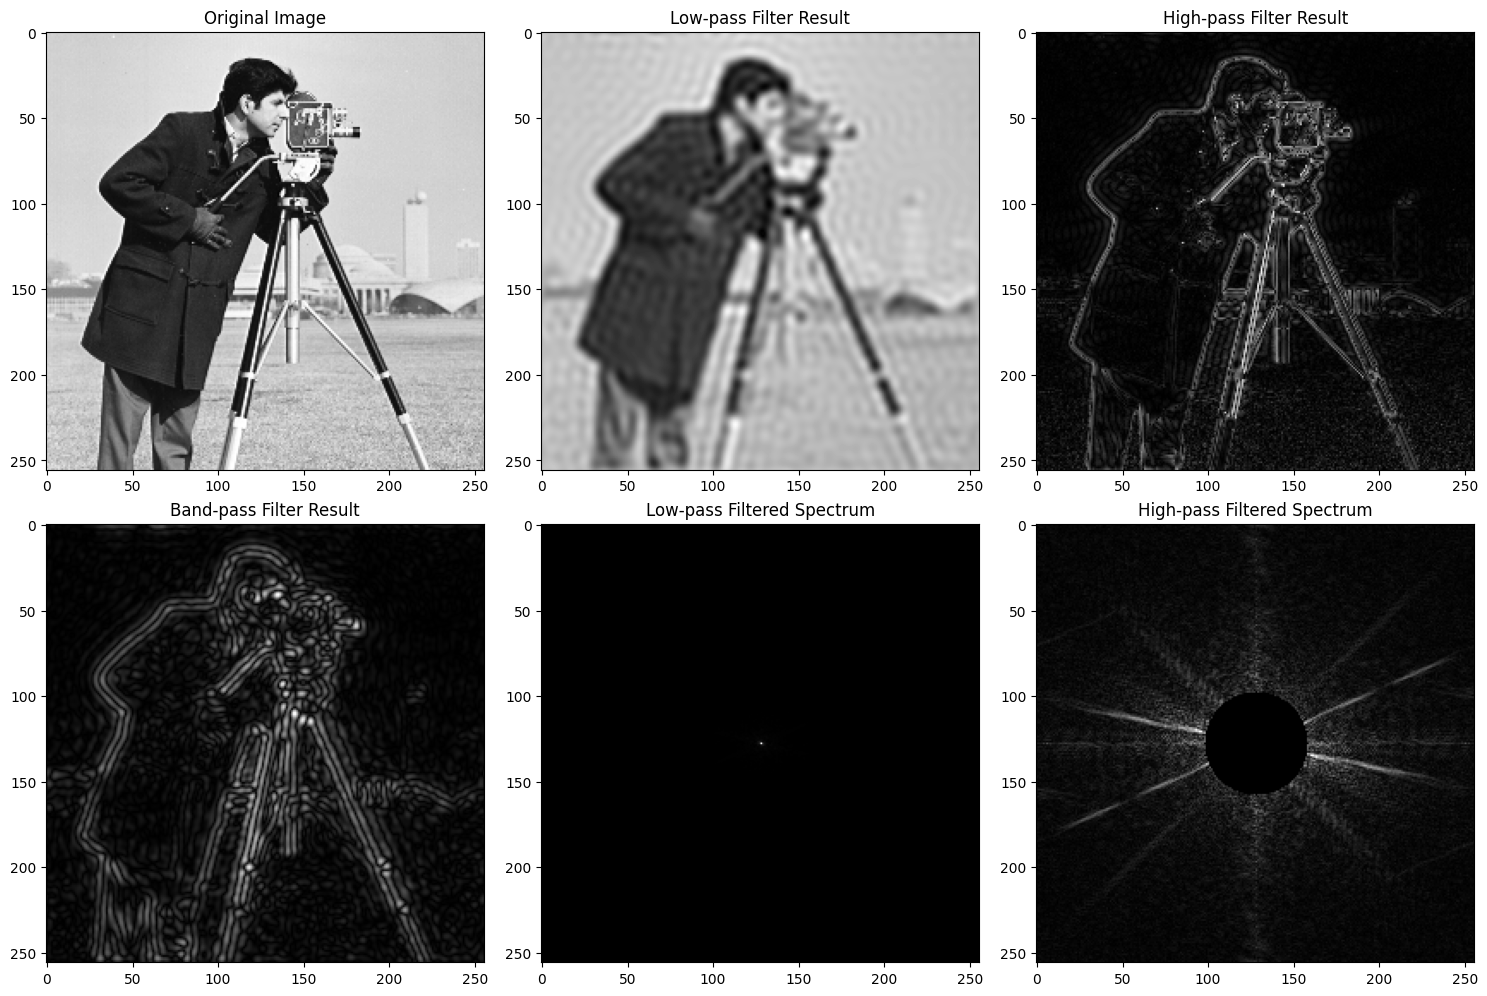

In [5]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

low_pass_filter = np.zeros((rows, cols))
cv2.circle(low_pass_filter, (ccol, crow), 30, 1, -1)

high_pass_filter = np.ones((rows, cols))
cv2.circle(high_pass_filter, (ccol, crow), 30, 0, -1)

band_pass_filter = np.zeros((rows, cols))
cv2.circle(band_pass_filter, (ccol, crow), 50, 1, -1)
cv2.circle(band_pass_filter, (ccol, crow), 20, 0, -1)

low_pass_result = np.fft.ifft2(np.fft.ifftshift(dft_shifted * low_pass_filter))
high_pass_result = np.fft.ifft2(np.fft.ifftshift(dft_shifted * high_pass_filter))
band_pass_result = np.fft.ifft2(np.fft.ifftshift(dft_shifted * band_pass_filter))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')

axes[0, 1].imshow(np.abs(low_pass_result), cmap='gray')
axes[0, 1].set_title('Low-pass Filter Result')

axes[0, 2].imshow(np.abs(high_pass_result), cmap='gray')
axes[0, 2].set_title('High-pass Filter Result')

axes[1, 0].imshow(np.abs(band_pass_result), cmap='gray')
axes[1, 0].set_title('Band-pass Filter Result')

axes[1, 1].imshow(np.abs(dft_shifted * low_pass_filter), cmap='gray')
axes[1, 1].set_title('Low-pass Filtered Spectrum')

axes[1, 2].imshow(np.abs(dft_shifted * high_pass_filter), cmap='gray')
axes[1, 2].set_title('High-pass Filtered Spectrum')

plt.tight_layout()
plt.show()


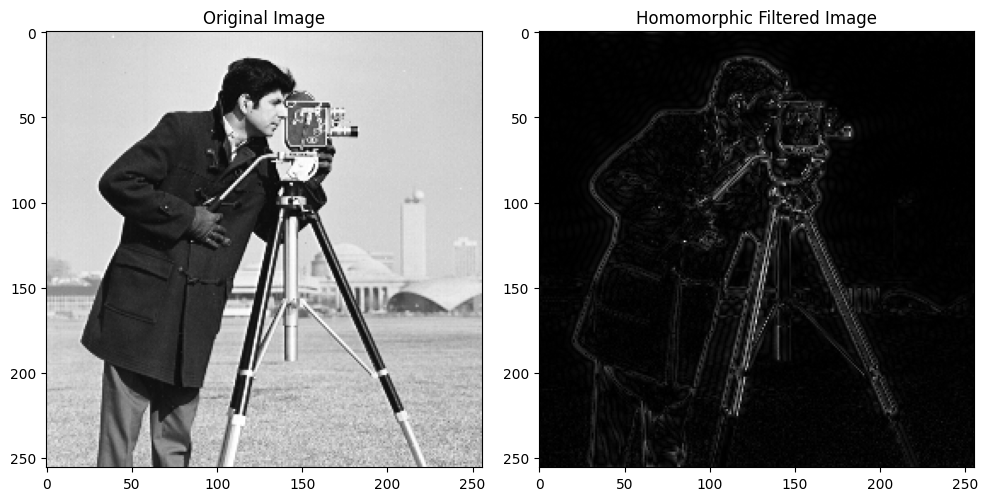

In [6]:
image_log = np.log1p(image)

dft_log = np.fft.fft2(image_log)
dft_log_shifted = np.fft.fftshift(dft_log)

high_pass_filter = np.ones((rows, cols))
cv2.circle(high_pass_filter, (ccol, crow), 30, 0, -1)

dft_filtered = dft_log_shifted * high_pass_filter

dft_filtered_ishifted = np.fft.ifftshift(dft_filtered)
image_filtered_log = np.fft.ifft2(dft_filtered_ishifted)

image_filtered = np.expm1(np.abs(image_filtered_log))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(image_filtered, cmap='gray')
axes[1].set_title('Homomorphic Filtered Image')

plt.tight_layout()
plt.show()
